Connected to id210 device.
Recorded Data: 1800.0, Gate: 1800.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 200.0, Gate: 200.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 200.0, Gate: 200.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate: 400.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 0.0, Gate: 0.0
Recorded Data: 400.0, Gate:

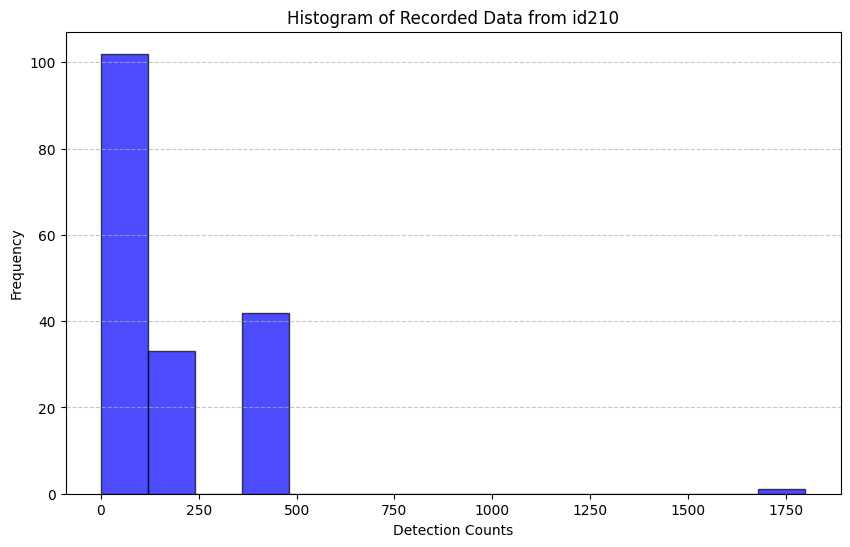

In [40]:
import socket
import time
import matplotlib.pyplot as plt

# Replace with the actual IP address of the id210 device
ID210_IP = "169.254.132.203"  # Example IP
ID210_PORT = 5025  # Default port for id210

# Function to record data from id210
def record_data(duration=100, interval=1):
    """
    Records data from the id210 detector for a specified duration.
    
    Parameters:
        duration (int): Total time to record data in seconds.
        interval (int): Time between consecutive data queries in seconds.
    
    Returns:
        list: Recorded data stored in a vector (Python list).
    """
    data_vector = []  # List to store retrieved data
    
    try:
        # Establish a TCP connection to the id210 device
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:

            s.connect((ID210_IP, ID210_PORT))
            print("Connected to id210 device.")

            # Command to set the detector mode to Internal_Gating
            command = "Detector:Mode Internal_Gating\n"
            s.sendall(command.encode())
            # Receive response
            response = s.recv(1024).decode().strip()
            print("Response:", response)

            command = "Counter:Frequency_Mode Current\n"
            s.sendall(command.encode())

            command = "Counter:Counting_Mode Frequency\n" #"Counter:Counting_Mode Totalize\n"   
            s.sendall(command.encode())
            
            command = "Counter:Integration_Time 1\n"   #Counter:Counting_Mode Frequency
            s.sendall(command.encode())

            start_time = time.time()
            while time.time() - start_time < duration:                
           
                # Send command to retrieve count data
                command = "Counter:Detection?\n"
                s.sendall(command.encode())
                # Receive response
                detection_count = s.recv(1024).decode().strip()
                
                # Extract counter value from the response
                try:
                    counter_value = float(detection_count.split(",")[0])  # Extract first value
                    data_vector.append(counter_value)
                    print(f"Recorded Data: {counter_value}")

                except ValueError:
                    print("Error parsing response:", response)
                
                # Wait for the next interval
                time.sleep(interval)

        print("Data recording completed.")

    except Exception as e:
        print("Error:", str(e))

    return data_vector

# Run the recording function
data_vector = record_data(duration=200, interval=1)

# Display recorded data
print("\nRetrieved Data Vector:", data_vector)
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_vector, bins=15, edgecolor='black', alpha=0.7, color='blue')

# Labels and title
plt.xlabel("Detection Counts")
plt.ylabel("Frequency")
plt.title("Histogram of Recorded Data from id210")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()